<div align="center">
  <h1>Wine Quality Prediction</h1>
</div>


In [ ]:
#Install required packages
#%pip install numpy pandas matplotlib seaborn xgboost scikit-learn

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset and checking the basic information about the dataset
df = pd.read_csv('./datasets/winequalityN.csv')
df.head()
df.tail()
df.info()
df.describe().T
df.isnull().sum()
df['type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


array(['white', 'red'], dtype=object)

In [3]:
#handling missing values by replacing with mean value of the column
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

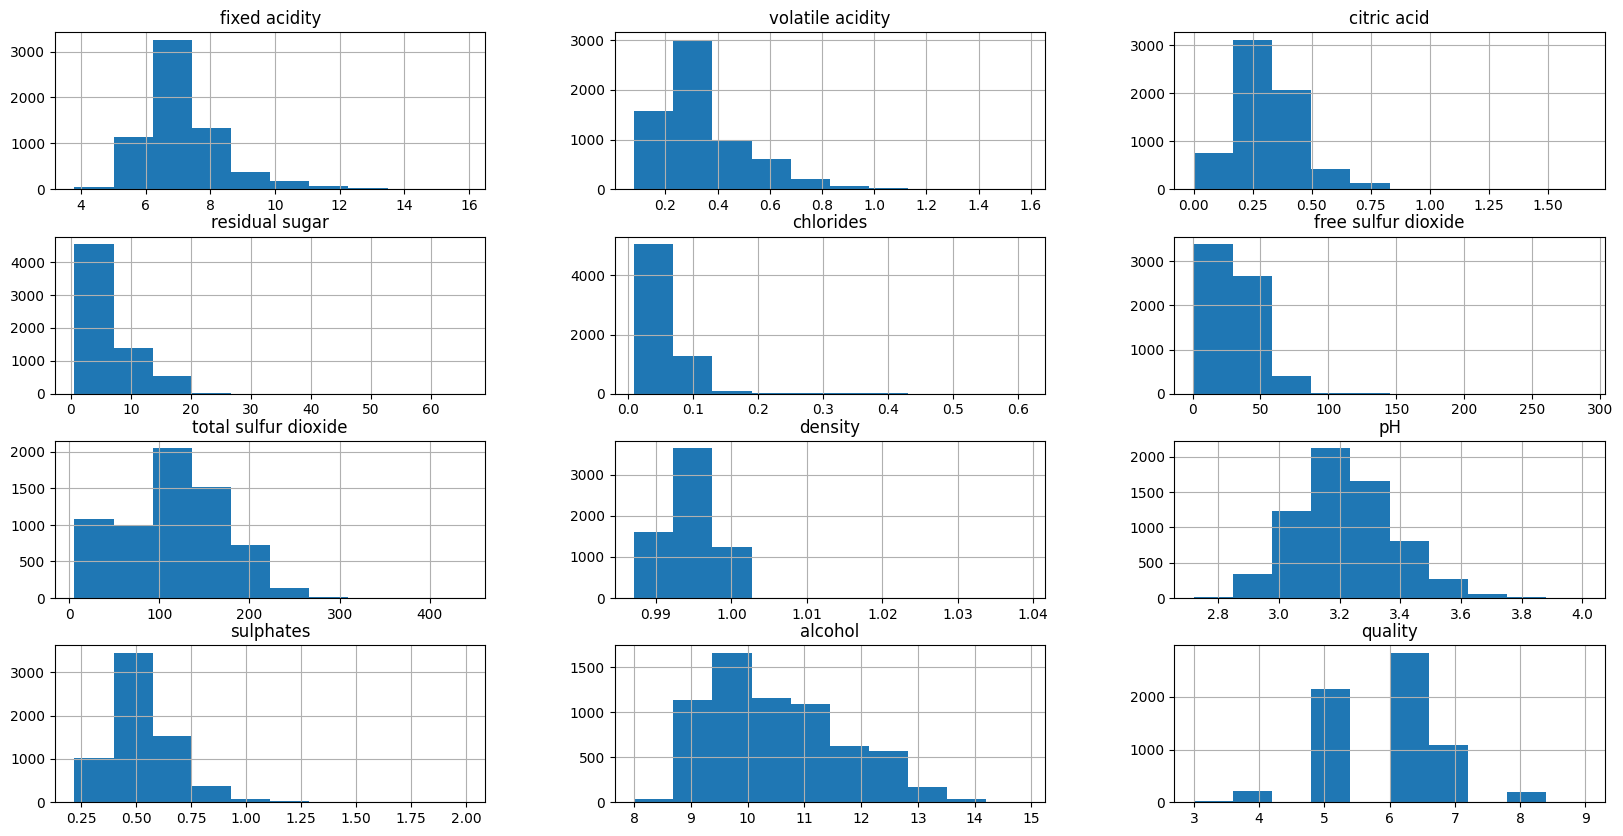

In [4]:
#data visualization

df.hist(figsize=(20, 10))

In [5]:
# Encode 'type' column to numeric for correlation
if df['type'].dtype == 'object':
    df['type'] = df['type'].map({'white': 0, 'red': 1})
df.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.486913,0.652606,-0.187073,-0.348982,0.512596,-0.471644,-0.700357,0.390645,0.328514,0.486662,-0.032970,-0.119323
fixed acidity,0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,-0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


<Axes: >

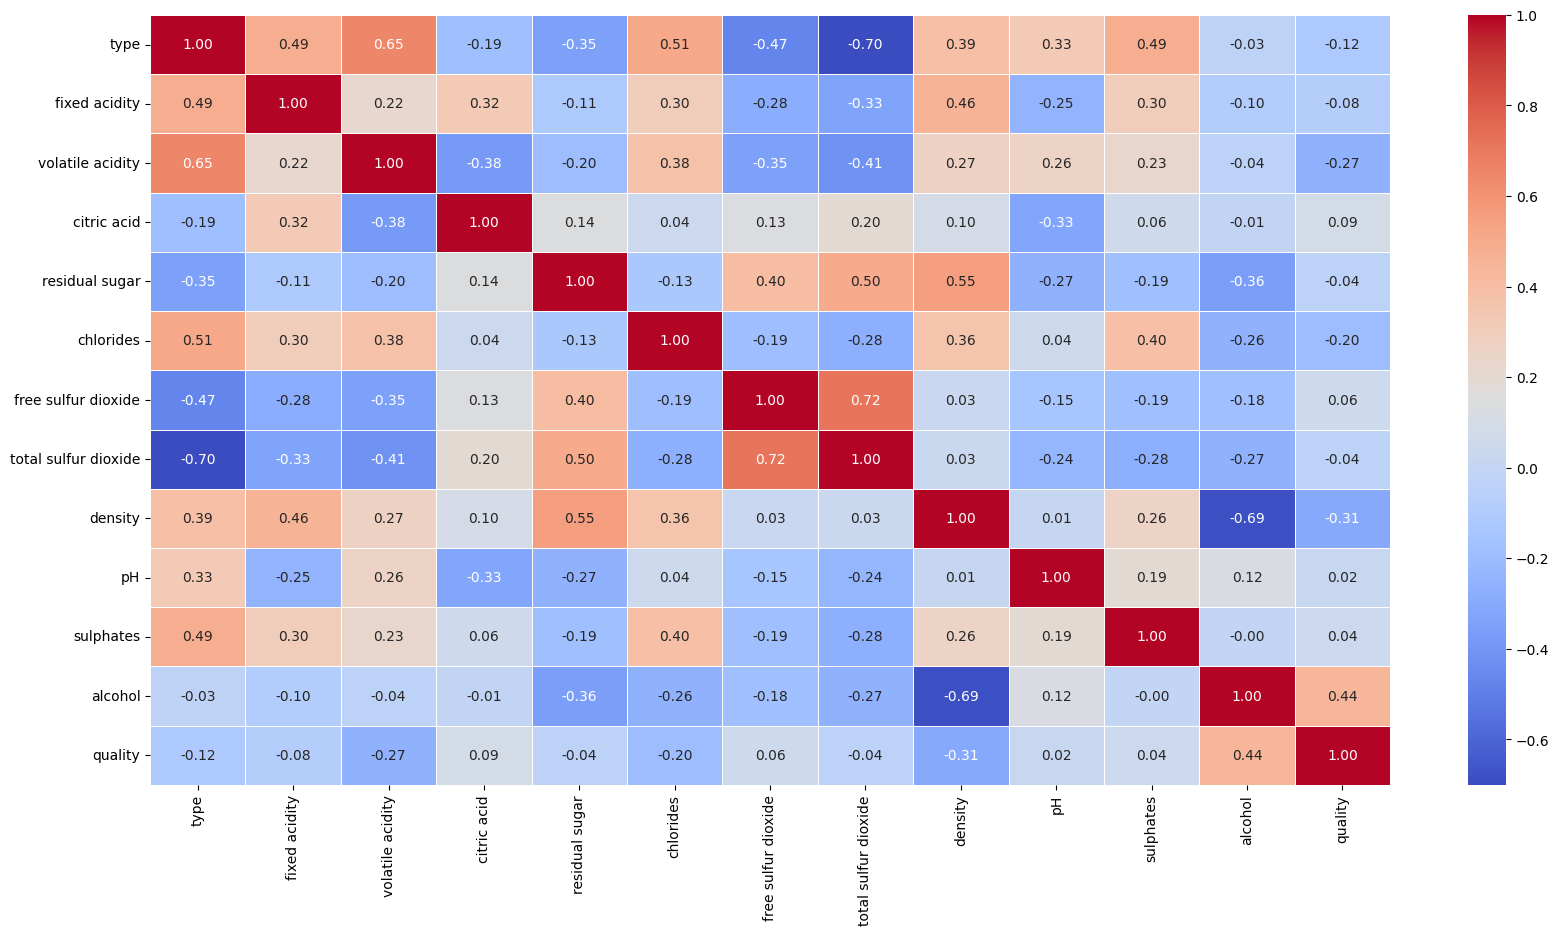

In [6]:
# Correlation heatmap   
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",
linewidths=0.5)

In [7]:
#checking unique values in target column
df.quality.unique() #array([6, 5, 7, 8, 4, 3, 9])

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
# quality column is having multiple values so we will convert it into binary classification
df['best quality'] = [1 if x > 5 else 0 for x in df['quality']]

In [9]:
#dropping the original quality column
df = df.drop(columns='quality')

In [10]:
# Encoding categorical variable 'type' using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [11]:
#splitting the dataset into train and test
y = df['best quality']
X = df.drop(columns='best quality')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=89)
X_train.shape, X_test.shape # (5197, 12), (1300, 12))
                                                

((5197, 12), (1300, 12))

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

In [13]:
#model building using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score
lr_prediction 
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_accuracy

0.7469230769230769

Finally, I used the Support Vector Classifier.


In [14]:
#model building using Decision Tree Classifier
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_prediction = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_prediction)
svc_accuracy

0.7192307692307692